from https://glowingpython.blogspot.com/2012/02/convolution-with-numpy.html

# Convolution with numpy

A convolution is a way to combine two sequences, x and w, to get a third sequence, y, that is a filtered version of x. The convolution of the sample xt is computed as follows:

$$
y_t = \sum_{i=0}^{k} x_{t+i} w_i

It is the mean of the weighted summation over a window of length k and wt are the weights. Usually, the sequence w is generated using a window function. Numpy has a number of window functions already implemented: bartlett, blackman, hamming, hanning and kaiser. So, let's plot some Kaiser windows varying the parameter beta:

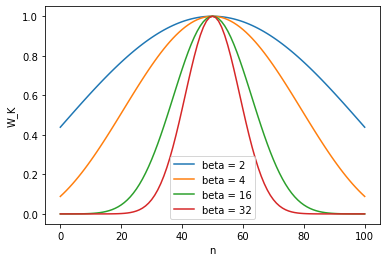

In [2]:
import numpy
import pylab

beta = [2,4,16,32]

pylab.figure()
for b in beta:
    w = numpy.kaiser(101,b) 
    pylab.plot(range(len(w)),w,label="beta = "+str(b))
pylab.xlabel('n')
pylab.ylabel('W_K')
pylab.legend()
pylab.show()

And now, we can use the function convolve(...) to compute the convolution between a vector x and one of the Kaiser window we have seen above:

In [3]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = numpy.kaiser(window_len,beta)
    y = numpy.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

Let's test it on a random sequence:

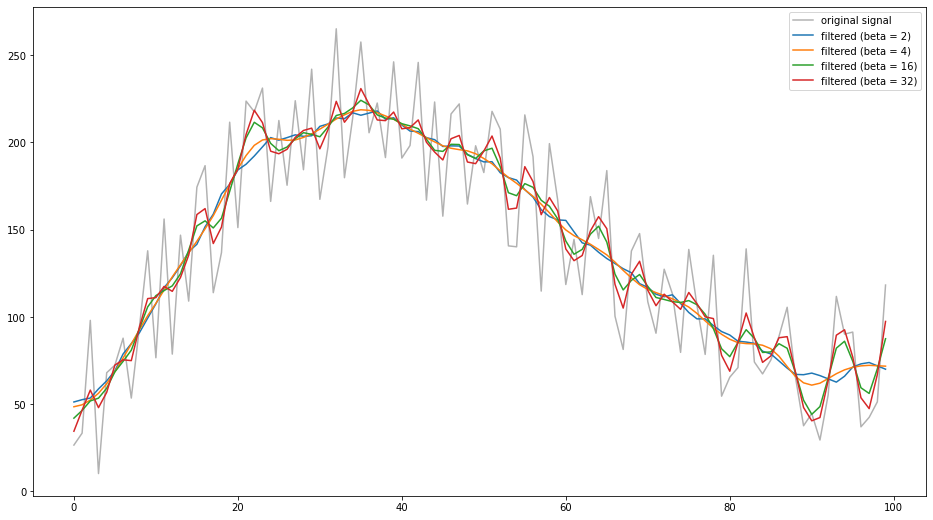

In [5]:
# random data generation
y = numpy.random.random(100)*100 
for i in range(100):
    y[i]=y[i]+i**((150-i)/80.0) # modifies the trend

# smoothing the data
pylab.figure(1)
# adjust the figure size
pylab.rcParams["figure.figsize"] = [20,10]
pylab.plot(y,'-k',label="original signal",alpha=.3)
for b in beta:
    yy = smooth(y,b) 
    pylab.plot(yy,label="filtered (beta = "+str(b)+")")
pylab.legend()
pylab.show()

As we can see, the original sequence have been smoothed by the windows.

> 真的不得不说这个做的东西叫光滑化，其实就是降噪，之前写过用matlab做的小波，这里用的卷积做的，感觉也好有意思，大体就是用数据一个小区域的特征值代替这个区域去做为该区域的值，最后卷积后得到的序列就相当于进行了平滑化了。